In [11]:
import hmip.hopfield as hop
import numpy as np
import matplotlib.pyplot as plt

### case 1 

In [70]:
H = np.array([[2, 0], [0, 1]])
q = np.array([-2.7, -1.8])
k_max = 100
binary_indicator = np.array([0, 1])
beta = 4
ub = np.array([1, 1])
lb = np.array([0, 0])
L = 1

x, x_h, f_val_hist, step_size = hop.hopfield(H, q, lb, ub, binary_indicator, L, k_max=k_max)

Text(0,0.5,'x2')

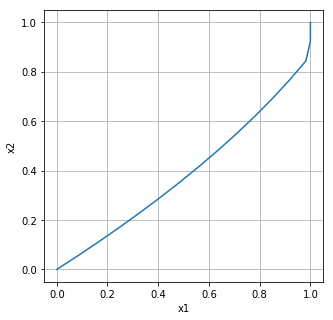

In [71]:
plt.figure(figsize=(5, 5))
plt.plot(x[0, :], x[1, :])
plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')

### Case 2

In [72]:
H = np.array([[2, 1], [1, 1]])
q = np.array([-2.7, -1.8])
k_max = 100
binary_indicator = np.array([0, 1])
beta = 4
ub = np.array([1, 1])
lb = np.array([0, 0])
L = 1

x, x_h, f_val_hist, step_size = hop.hopfield(H, q, lb, ub, binary_indicator, L, k_max=k_max)

Text(0,0.5,'x2')

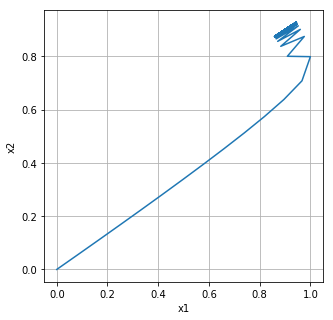

In [73]:
plt.figure(figsize=(5, 5))
plt.plot(x[0, :], x[1, :])
plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')

### Case 3

In [80]:
H = np.array([[2, 0], [0, 2]])
q = np.array([-8, -1])
k_max = 100
binary_indicator = np.array([0, 1])
beta = 4
ub = np.array([1, 1])
lb = np.array([0, 0])
L = 1

x, x_h, f_val_hist, step_size = hop.hopfield(H, q, lb, ub, binary_indicator, L, k_max=k_max)

Text(0,0.5,'x2')

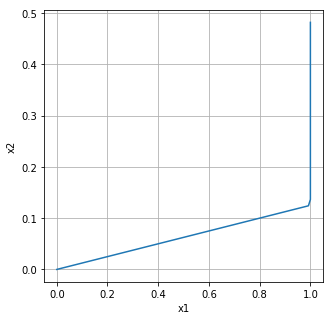

In [81]:
plt.figure(figsize=(5, 5))
plt.plot(x[0, :], x[1, :])
plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')